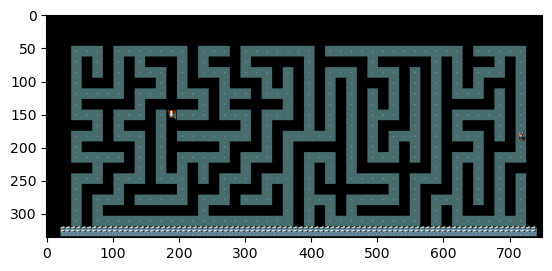

In [1]:
from matplotlib import pyplot as plt
import gym
import time
from nle import nethack
# from utils.utils import get_target_location, get_player_location, get_valid_moves
import minihack
# Create the MiniHack environment
env = gym.make(
    "MiniHack-MazeWalk-Mapped-45x19-v0",
    observation_keys=("chars", "pixel"),
)


# Reset the environment to get the initial observation
state = env.reset()
game_map = state['chars']
plt.imshow(state['pixel'][:, 250:1000, :])

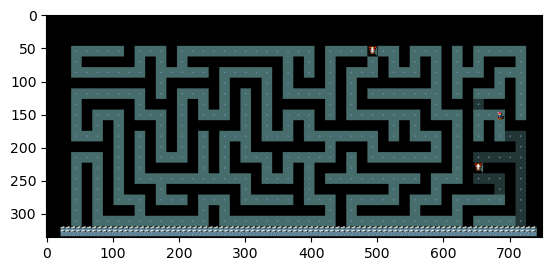

In [105]:
res = env.step(0)

plt.imshow(res[0]['pixel'][:, 250:1000, :])

In [31]:
# Enable interactive plot
%matplotlib notebook
import matplotlib.pyplot as plt
 
im = plt.imshow(state['pixel'][:, 250:1000, :])
def update(im, data):
    im.set_data(data['pixel'][:, 250:1000, :])
    # NOTE: there is no .set_data() for 3 dim data...
    plt.draw()
    plt.pause(0.001)  # Note this correction

res = env.step(0)
data = res[0]
update(im, data)


res = env.step(0)
data = res[0]
update(im, data)

In [12]:
import pandas as pd
df = pd.read_csv('results.csv', index_col=0)
df.head(50)

,time,explored,solution,ex_sol_score,score
name,,,,,
ASTAR-EUCLIDEAN,0.009829,179,82,0.273356,0.942723
AStar,0.009069,172,82,0.328297,0.942723
BFS,0.009140,206,204,0.951587,0.029985
DFS,0.008016,201,199,0.951587,0.813139
Dijkstra,0.009448,204,82,0.010263,0.942723
Greedy,0.008687,129,129,1.000000,0.838563


In [ ]:
bfs_start_time = time.time()
bfs_path = bfs(game_map, start, target)
bfs_end_time = time.time()
bfs_total_time = bfs_end_time - bfs_start_time

In [ ]:
bfs_path

In [ ]:
dfs_start_time = time.time()
dfs_path = dfs(game_map, start, target)
dfs_end_time = time.time()
dfs_total_time = dfs_end_time - dfs_start_time

In [ ]:
dfs_path

In [ ]:
greedy_start_time = time.time()
greedy_path = greedy_search(game_map, start, target)
greedy_end_time = time.time()
greedy_total_time = greedy_end_time - greedy_start_time

In [ ]:
greedy_path

In [ ]:
a_star_h_start_time = time.time()
path = a_star(game_map, start, target, h=h)
a_star_h_end_time = time.time()
a_star_h_total_time = a_star_h_end_time - a_star_h_start_time

a_star_h2_start_time = time.time()
path2 = a_star(game_map, start, target, h=h2)
a_star_h2_end_time = time.time()
a_star_h2_total_time = a_star_h2_end_time - a_star_h2_start_time

a_star_stackoverflowh_start_time = time.time()
path3 = a_star(game_map, start, target, h=stackoverflowh)
a_star_stackoverflowh_end_time = time.time()
a_star_stackoverflowh_total_time = a_star_stackoverflowh_end_time - a_star_stackoverflowh_start_time

a_star_sqrt_h_start_time = time.time()
path4 = a_star(game_map, start, target, h=Manhattan_Distance)
a_start_sqrt_h_end_time = time.time()
a_star_sqrt_h_total_time = a_start_sqrt_h_end_time - a_star_sqrt_h_start_time

In [ ]:
dijkstra_start_time = time.time()
dijkstra_path = dijkstra(game_map, start, target)
dijkstra_end_time = time.time()
dijkstra_total_time = dijkstra_end_time - dijkstra_start_time

In [ ]:
dijkstra_path

In [ ]:
import pandas as pd
def assign_scores_and_retrieve_ordered_list(paths_time_took_name: list):
    """
    Assigns a score to each path and returns a list of paths ordered by score.
    """
    ordered_paths = []
    for path, time_took, name in paths_time_took_name:
        score = 0
        for i in range(len(path) - 1):
            score += abs(path[i][0] - path[i + 1][0]) + abs(path[i][1] - path[i + 1][1])
        path_length = len(path)
        ordered_paths.append((score, path_length, time_took, path, name))
    ordered_paths.sort(key=lambda x: x[0])
    # Normalize scores
    max_score = ordered_paths[-1][0]
    for i in range(len(ordered_paths)):
        ordered_paths[i] = (1-ordered_paths[i][0] / max_score, ordered_paths[i][1], ordered_paths[i][2], ordered_paths[i][3], ordered_paths[i][4])

    # return pandas df
    return pd.DataFrame(ordered_paths, columns=['score', 'path_length', 'took', 'path', 'name'])

scores = assign_scores_and_retrieve_ordered_list([(path, a_star_h_total_time, 'A_Start_h1'), (path2, a_star_h2_total_time, 'A_Start_h2'), (path3, a_star_stackoverflowh_total_time, 'A_Start_hstack'), (path4, a_star_sqrt_h_total_time, 'A_Start_sqrt'), (bfs_path, bfs_total_time, 'BFS'), (dfs_path, dfs_total_time, 'DFS'), (greedy_path, greedy_total_time, 'Greedy'), (dijkstra_path, dijkstra_total_time, 'Dijkstra')])

In [ ]:
scores